# Validação de modelos de clusterização [24E4_3]

## Aluno: Eder Jani Martins
## E-mail: eder.martins@al.infnet.edu.br
### Data 09/12/2024



## Para executar no Google Colab

In [ ]:
# Só precisa ser executado se este notebook for executado no Google Colab
!pip install scikit-learn-extra

## Import das bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+
> `Python 3.11.10`

2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
> `conda 24.9.2`

3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
> Todas as bibliotecas foram criadas no ambiente `clustering`

4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
> Todos os pacotes foram instalados e importados em 09/12/2024

**requirements.txt :**
```python
anyio==4.6.2.post1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.9
decorator==5.1.1
defusedxml==0.7.1
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.55.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.7
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.28
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.6
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
kiwisolver==1.4.7
MarkupSafe==3.0.2
matplotlib==3.9.2
matplotlib-inline==0.1.7
mistune==3.0.2
nbclient==0.10.0
nbconvert==7.16.4
nbformat==5.10.4
nest-asyncio==1.6.0
notebook==7.2.2
notebook_shim==0.2.4
numpy==2.1.3
overrides==7.7.0
packaging==24.2
pandas==2.2.3
pandocfilters==1.5.1
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prometheus_client==0.21.0
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
pycparser==2.22
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
python-json-logger==2.0.7
pytz==2024.2
PyYAML==6.0.2
pyzmq==26.2.0
referencing==0.35.1
requests==2.32.3
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.21.0
scikit-learn==1.5.2
scikit-learn-extra==0.3.0
scipy==1.14.1
Send2Trash==1.8.3
six==1.16.0
sniffio==1.3.1
soupsieve==2.6
stack-data==0.6.3
terminado==0.18.1
threadpoolctl==3.5.0
tinycss2==1.4.0
tornado==6.4.2
traitlets==5.14.3
types-python-dateutil==2.9.0.20241003
typing_extensions==4.12.2
tzdata==2024.2
uri-template==1.3.0
urllib3==2.2.3
wcwidth==0.2.13
webcolors==24.11.1
webencodings==0.5.1
websocket-client==1.8.0
```

5. Tire um printscreen do ambiente que será usado rodando em sua máquina.
![](screenshots/screenshot-01.jpg)

6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).
> Projeto disponível na íntegra em [https://github.com/edermartins/ia-lab/tree/main/clustering_models_validation](https://github.com/edermartins/ia-lab/tree/main/clustering_models_validation)

**Dica**: Gere um relatório rico em gráficos que dêem respaldo aos resultados

# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
> Para este trabalho foram escolhidas duas bases
> 
>    > Ìndice de probreza no Brasil: https://www.kaggle.com/datasets/fidelissauro/indices-pobreza-brasil
>
>    > Série histórica das ações na bolsa de valores das maiores impresas de tecnologia: Kaggle: https://www.kaggle.com/datasets/umerhaddii/big-tech-giants-stock-price-data

2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
> A primeira base, `Ìndice de probreza no Brasil`, foi utilizada na parte de clusterização. Indentificando dados comuns ou carascteríscas, que não a probreza em si, que causam este problema, apesar de um exercício lúdico, se feito em larga escala pode ajudar a combater a pobreza no Brasil.
>
> A segundo base de dados foi escolhida para responder a questão de série histórica e foi escolhida para entender como o processo de clusterização se comparta com dados da bolsa de valores.

3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
> Os dados desta questão estão mais abaixo

4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.
> Os dados foram normalizados utilizando sklearn.preprocessing.StandardScaler, que realiza a normalização seguinte esta fórmula:
> 
> Xscaled = X − mean(X) / std(X)
>
> Também há um campo data no formato texto "MM/AAAA" que foi convertido para timestamp, consierando o dia 01 de cada mês. Desta forma o campo se torna numérico, podendo ser normalizado.


# Carregar os dados

In [28]:
# Carregar os dados

# Verifica se existe o arquivo local
url = './data/indices_pobreza_consolidado.csv'
if not os.path.isfile(url):
  # Caso contrário vai buscar no mwu github publico
  url = 'https://raw.githubusercontent.com/edermartins/ia-lab/refs/heads/main/clustering_models_validation/data/indices_pobreza_consolidado.csv'

In [29]:
# Carregando os dados
df = pd.read_csv(url)
# Selecionando as colunas relevantes para o agrupamento
fields = ['time_diff', 'periodo', 'pobreza', 'extrema_pobreza', 'total', 'populacao_estimada', 'porcentagem_pobreza', 'porcentagem_extrema_pobreza', 'porcentagem_vulnerabilidade', 'familias_pobreza', 'familias_extrema_pobreza', 'familias_vulnerabilidade', 'indigenas_pobreza', 'indigenas_extrema_pobreza', 'indigenas_vulnerabilidade', 'quilombolas_pobreza', 'quilombolas_extrema_pobreza', 'quilombolas_vulnerabilidade', 'ciganos_pobreza', 'ciganos_extrema_pobreza', 'ciganos_vulnerabilidade']

In [30]:
# Data de referência (01/01/1970)
reference_date = pd.to_datetime('1970-01-01')
# Convertendo a coluna 'referencia' para o formato datetime
df['referencia'] = pd.to_datetime(df['referencia'], format='%m/%Y')
# Assuming 'reference_date' is a reference datetime
df['time_diff'] = (df['referencia'] - reference_date).dt.days

## Analisando os dados

### Visualizando algumas informações do Dataset

In [5]:
# Verificando campos nulos
df.isna().sum()

referencia                     0
periodo                        0
pobreza                        0
extrema_pobreza                0
total                          0
populacao_estimada             0
porcentagem_pobreza            0
porcentagem_extrema_pobreza    0
porcentagem_vulnerabilidade    0
familias_pobreza               0
familias_extrema_pobreza       0
familias_vulnerabilidade       0
indigenas_pobreza              0
indigenas_extrema_pobreza      0
indigenas_vulnerabilidade      0
quilombolas_pobreza            0
quilombolas_extrema_pobreza    0
quilombolas_vulnerabilidade    0
ciganos_pobreza                0
ciganos_extrema_pobreza        0
ciganos_vulnerabilidade        0
time_diff                      0
dtype: int64

In [6]:
# Mostra as primeiras linhas do dataset
df.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,time_diff
0,2012-08-01,201208,19370363,44381455,63751818,193976530,0.1,0.23,0.33,5265743,...,14144,86593,100737,7927,57407,65334,119,757,876,15553
1,2012-09-01,201209,19371279,44554715,63925994,193976530,0.1,0.23,0.33,5278170,...,14157,87216,101373,8022,58018,66040,123,825,948,15584
2,2012-10-01,201210,19376665,44652093,64028758,193976530,0.1,0.23,0.33,5288902,...,14171,87397,101568,8081,58468,66549,131,888,1019,15614
3,2012-11-01,201211,19381040,44723215,64104255,193976530,0.1,0.23,0.33,5298295,...,14182,87697,101879,8198,59193,67391,142,925,1067,15645
4,2012-12-01,201212,19392882,44684759,64077641,193976530,0.1,0.23,0.33,5311337,...,14209,87820,102029,8314,60250,68564,143,978,1121,15675


In [7]:
# Tamanho do dataset
df.shape

(122, 22)

In [8]:
# Mostrar estatísticas descritivas para entender a faixa dinâmica das variáveis
df.describe()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade,time_diff
count,122,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000,122.000000,1.220000e+02,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2017-08-16 05:42:17.704918016,201722.926230,1.294801e+07,4.123146e+07,5.417947e+07,2.072112e+08,0.063115,0.199590,0.262049,3.865711e+06,...,14178.557377,113506.262295,127684.819672,10754.508197,113959.319672,124713.827869,531.024590,4089.532787,4620.557377,17394.237705
min,2012-08-01 00:00:00,201208.000000,8.454642e+06,3.680346e+07,4.722933e+07,1.939765e+08,0.040000,0.180000,0.220000,2.746503e+06,...,11938.000000,86593.000000,100737.000000,7927.000000,57407.000000,65334.000000,119.000000,757.000000,876.000000,15553.000000
25%,2015-02-08 00:00:00,201502.250000,8.978068e+06,3.869862e+07,4.889201e+07,2.044829e+08,0.040000,0.190000,0.230000,2.984406e+06,...,12985.750000,103766.750000,119333.000000,10008.500000,95551.750000,107135.000000,442.000000,2628.000000,3070.000000,16474.000000
50%,2017-08-16 12:00:00,201708.500000,1.224877e+07,3.977743e+07,5.229294e+07,2.076609e+08,0.060000,0.190000,0.250000,3.668068e+06,...,14176.500000,112339.500000,126531.000000,10717.500000,116309.000000,127667.500000,600.500000,4213.000000,4859.500000,17394.500000
75%,2020-02-22 18:00:00,202002.750000,1.545177e+07,4.420067e+07,5.770898e+07,2.117557e+08,0.080000,0.220000,0.280000,4.435881e+06,...,15310.500000,121316.000000,133819.750000,11741.750000,132042.500000,141612.500000,650.500000,5558.750000,6154.750000,18314.750000
max,2022-09-01 00:00:00,202209.000000,1.939364e+07,4.905594e+07,6.439655e+07,2.133176e+08,0.100000,0.230000,0.330000,5.398817e+06,...,16711.000000,170009.000000,185613.000000,12770.000000,195070.000000,207596.000000,827.000000,8534.000000,9361.000000,19236.000000
std,NaN,296.501924,4.046276e+06,3.015699e+06,6.015011e+06,4.830405e+06,0.021897,0.016929,0.034830,9.582630e+05,...,1329.345891,16898.300395,16223.673727,1196.410784,30560.916202,30885.494908,177.203131,1902.720763,2064.622804,1076.305274


In [9]:
# Verificando campos duplicados e analisando a estrutura do dataset
print("Quantidade de campos duplicados:", df.duplicated().sum())
df.info()

Quantidade de campos duplicados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   referencia                   122 non-null    datetime64[ns]
 1   periodo                      122 non-null    int64         
 2   pobreza                      122 non-null    int64         
 3   extrema_pobreza              122 non-null    int64         
 4   total                        122 non-null    int64         
 5   populacao_estimada           122 non-null    int64         
 6   porcentagem_pobreza          122 non-null    float64       
 7   porcentagem_extrema_pobreza  122 non-null    float64       
 8   porcentagem_vulnerabilidade  122 non-null    float64       
 9   familias_pobreza             122 non-null    int64         
 10  familias_extrema_pobreza     122 non-null    int64         
 11  familias_v

In [31]:
# Normalização dos dados para a clusterização
X = df[fields]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Exibindo o dataset normalizado
X_scaled

array([[-1.71775658, -1.74383234,  1.59377021, ..., -2.33474242,
        -1.75867911, -1.82115537],
       [-1.68883557, -1.74044578,  1.59399753, ..., -2.31207637,
        -1.72279343, -1.78613837],
       [-1.6608475 , -1.73705921,  1.59533412, ..., -2.26674427,
        -1.68954641, -1.75160771],
       ...,
       [ 1.66040397,  1.63934841, -0.93658444, ...,  1.33149106,
         2.01828789,  1.97429896],
       [ 1.68932498,  1.64273498, -0.89366393, ...,  1.51281945,
         2.16710789,  2.12701202],
       [ 1.71824599,  1.64612155, -0.85319103, ...,  1.67714831,
         2.34548079,  2.30550148]])

### Análise Exploratória

#### Histograma das variáveis de interesse

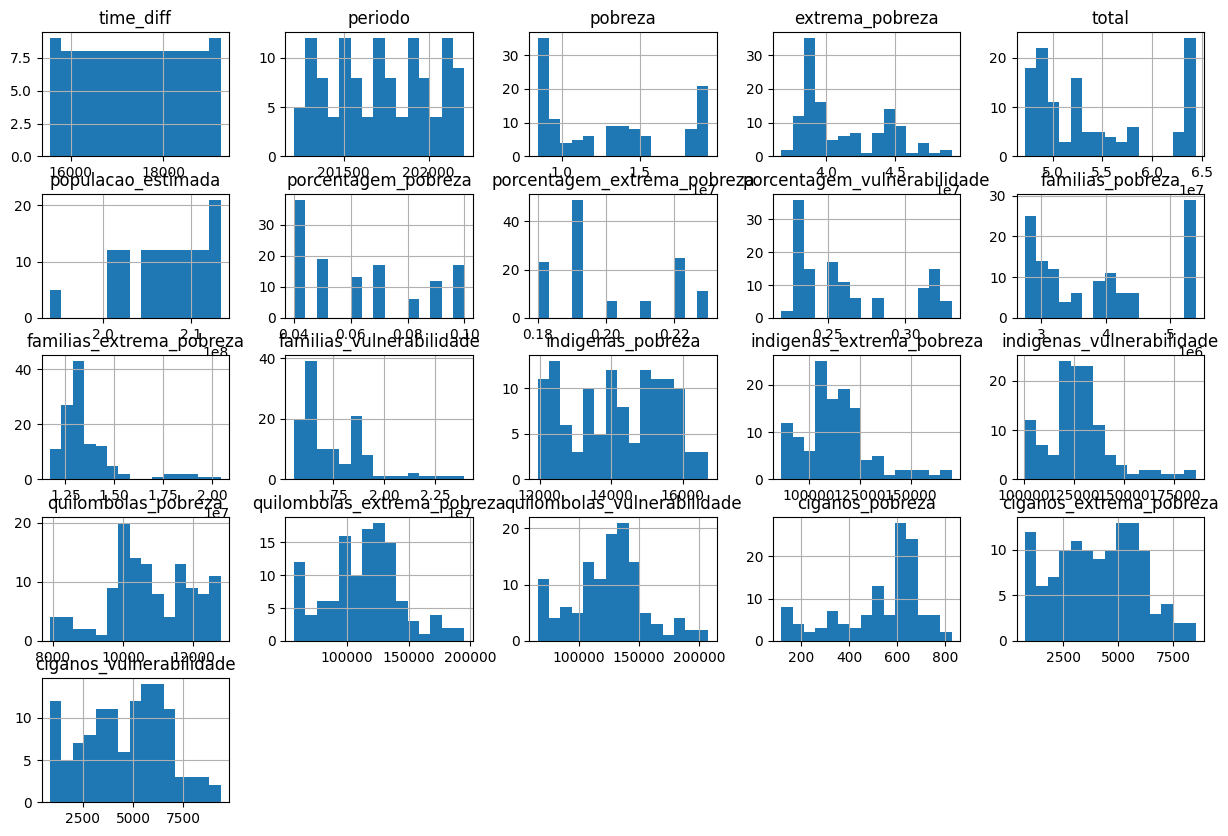

In [11]:
# Visualizando as variáveis de interesse
X.hist(bins=15, figsize=(15, 10))
plt.show()

# Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
   * K-Médias
   * DBScan
2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

> O índice de silhueta é uma métrica de avaliação da qualidade de agrupamentos (clusters) que mede a coesão e a separação dos clusters. É útil para determinar o quão bem cada ponto se encaixa em seu próprio cluster em comparação com os clusters vizinhos. Podemos descrever o algorítmo da seguinte forma:
> - Calcular a Distância Média Intra-Cluster
> - Calcular a Distância Média Inter-Cluster
> - Calcular a Pontuação de Silhueta para Cada Ponto
> - Calcular a Média das Pontuações de Silhueta para Todos os Pontos

> Com o gráfico do índice de silhueta foi possível identificar o número de clusters que maximiza a pontuação, sendo que os maiores valores são melhores.
> Como o K-Means requer a especificação do número de clusters, ao usar o índice de silhueta para encontrar o número ótimo de clusters, podemos encontrar o melhor valor.

3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

> K-Means mostrou valores do índice de silhueta significativamente menores, com 0.56 para 4 grupos, o que sugere que os clusters formados tem algum nível de separação e coesão (observar o gráfico mais abaixo).
> DBSCAN obteve um índice de silhueta maior, com  0.83, o que indica que a qualidade do agrupamento foi melhor do que K-Means
> - Esse valor sugere que muitos pontos foram bem agrupados, o que pode significar que o DBSCAN conseguiu identificar grupos densos e bem separados, ou que uma parcela significativa dos pontos ficou com pouco ruído (isso para `eps` = 0.4 e `min_samples` = 5)
> - Ao alterar o eps para cima ou para baixo, bem como o `min_samples` > 5 levou a uma piora no resultado.

> O DBSCAN se mostrou uma escolha mais robusta para esses dados, considerando o `eps`=0.4 e min_samples = 5. Isso é evidenciado pelo índice de silhueta mais alto, sugerindo que os clusters encontrados pelo DBSCAN são mais naturais para os dados utilizados, enquanto o K-Means teve um desenpenho razoável, um pouco inferior.

4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

Escolhi duas outras medidas, sendo elas (o código está mais abaixo) 

* Davies-Bouldin
    * É uma métrica de similaridade onde valores menores indicam melhor separação entre clusters
> Davies-Bouldin* Score para K-Means: 0.557177898714105
> 
> Davies-Bouldin Score para DBSCAN: 0.20457832188611869

* Calinski-Harabasz
    * Mede a razão entre a dispersão entre clusters e a dispersão intra-cluster. Valores maiores indicam agrupamentos mais compactos e bem separados
> Calinski-Harabasz Score para K-Means: 257.895436808774
> 
> Calinski-Harabasz Score para DBSCAN: 1775.0442955719238



5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

> Não é um índice indicado para DBScan. Embora o índice de silhueta possa ser calculado após a execução do DBSCAN para avaliar a qualidade dos clusters encontrados. Apesar dele não identificar o número de clusters, já que o DBSCAN não utiliza o conceito de número de clusters, mas faz uma busca num raio definido por `eps` e quantidade de vizinhos, definido por `min_samples`. Variamos estes valores, que vão encontrando clusters, diferente do K-means, que devemos escolhar a quantidade de grupos.
> 
> No entanto, pode ser usado como métríca de pós processamento, auxiliando a encontrar o "melhor" conjunto de parâmetros de `eps` e `min_samples`

## K-Médias + índice Silhueta

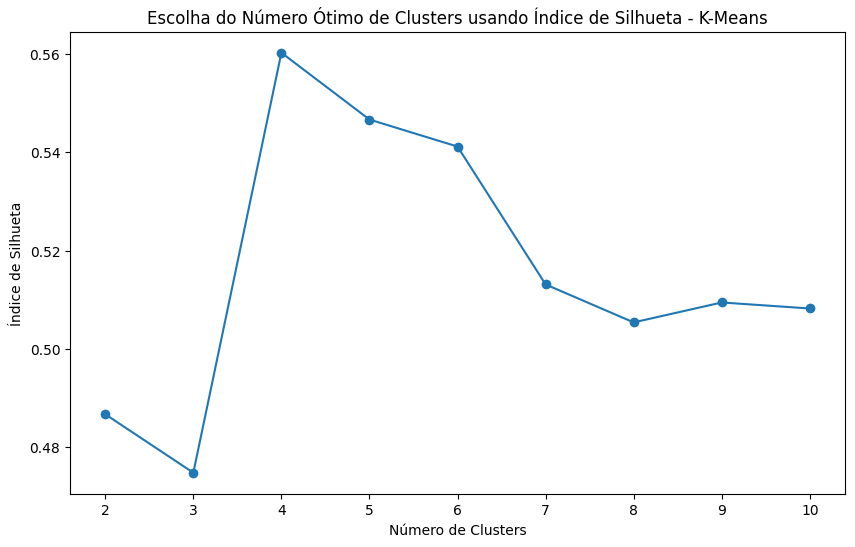

In [12]:
silhouette_scores = []
range_n_clusters = range(2, 11)

# Fazendo o K-Médias para uma faixa numérica
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o índice de silhueta para cada número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.title('Escolha do Número Ótimo de Clusters usando Índice de Silhueta - K-Means')
plt.show()

In [13]:
print("A melhor silheueta é:", max(silhouette_scores))

A melhor silheueta é: 0.560292960067479


## DBScan + índice Silhueta

O DBSCAN é um algoritmo baseado em densidade, portanto não necessita do número de clusters como parâmetro. Em vez disso, ele utiliza eps (raio de vizinhança) e min_samples (número mínimo de pontos em uma vizinhança). Vamos ajustar esses parâmetros e calcular o índice de silhueta:

In [24]:
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Filtrar clusters válidos
valid_labels = dbscan_labels != -1  # -1 são pontos considerados como ruído
X_scaled[valid_labels], dbscan_labels[valid_labels], dbscan_labels
silhouette_avg_dbscan = silhouette_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Índice de Silhueta para DBSCAN: {silhouette_avg_dbscan}")


Índice de Silhueta para DBSCAN: 0.8329189088821776


## Análise dos Resultados
* **Silhueta**: Para o K-Means, conseguimos definir o número ótimo de clusters, enquanto para o DBSCAN, o índice é menos efetivo devido à presença de ruídos.
* **Davies-Bouldin Score**: Mostra que o DBSCAN pode ter maior separação para clusters densos, enquanto o K-Means é geralmente menor para clusters globulares.
* **Calinski-Harabasz Score**: Ajuda a comparar a compactação e separação dos clusters. O valor maior para um dos algoritmos indicará melhor separação e menor sobreposição.

Conclusão sobre o Índice de Silhueta e DBSCAN
O **índice de silhueta** não é ideal para o **DBSCAN** devido à maneira como o DBSCAN trata pontos como ruídos e cria clusters com formas arbitrárias. O índice de silhueta assume clusters bem definidos e esféricos, o que não se aplica bem ao DBSCAN. Assim, para avaliar o DBSCAN, métricas como o Davies-Bouldin Score ou a análise de densidade são geralmente mais indicadas, pois consideram a distribuição dos dados e não requerem que todos os pontos pertençam a um cluster.

## Fazendo K-Médias com o melhor resultado

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

### Davies-Bouldin Score

In [49]:
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}")

davies_bouldin_dbscan = davies_bouldin_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Davies-Bouldin Score para DBSCAN: {davies_bouldin_dbscan}")

Davies-Bouldin Score para K-Means: 0.557177898714105
Davies-Bouldin Score para DBSCAN: 0.20457832188611869


O Davies-Bouldin Score é uma métrica de similaridade onde valores menores indicam melhor separação entre clusters.

### Calinski-Harabasz Score

In [50]:
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Score para K-Means: {calinski_harabasz_kmeans}")

calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled[valid_labels], dbscan_labels[valid_labels])
print(f"Calinski-Harabasz Score para DBSCAN: {calinski_harabasz_dbscan}")


Calinski-Harabasz Score para K-Means: 257.895436808774
Calinski-Harabasz Score para DBSCAN: 1775.0442955719238


O Calinski-Harabasz Score mede a razão entre a dispersão entre clusters e a dispersão intra-cluster. Valores maiores indicam agrupamentos mais compactos e bem separados.

## Comparação dos Resultados: K-Means vs. DBSCAN
* O índice de silhueta mede a coesão e separação dos clusters. Quanto maior o valor, melhor o agrupamento.
* Para o K-Means, o índice de silhueta nos ajudou a definir o número ótimo de clusters, que podemos justificar escolhendo o número que maximiza essa métrica.
* No caso do DBSCAN, aplicamos o índice de silhueta apenas aos pontos classificados (excluindo o ruído). DBSCAN é menos eficiente para índices de silhueta, já que esta métrica assume que todos os pontos estão associados a um cluster.

Podemos observar que:
* K-Means cria clusters esféricos, o que pode ser ideal para o índice de silhueta, enquanto DBSCAN é mais adequado para dados com formas arbitrárias.
* DBSCAN pode identificar pontos de ruído, o que o diferencia do K-Means.

# Medidas de similaridade

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.
2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.
3. Indique um caso de uso para essa solução projetada.
4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

### Método do Cotovelo

#### K-Média

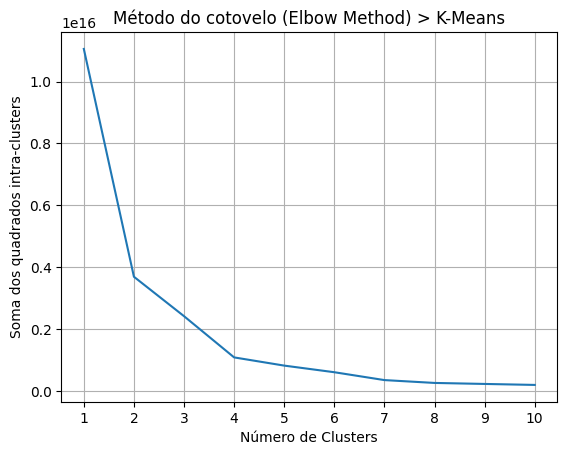

In [27]:
# Aplicando o Método do cotovelo (Elbow Method) > K-Média
elbow_graph=[]
for i in range(1,11):
    kmeans_result=KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans_result.fit(X)
    elbow_graph.append(kmeans_result.inertia_)
plt.plot(range(1, 11), elbow_graph)
plt.title('Método do cotovelo (Elbow Method) > K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Gráficos extras
## K-Médias

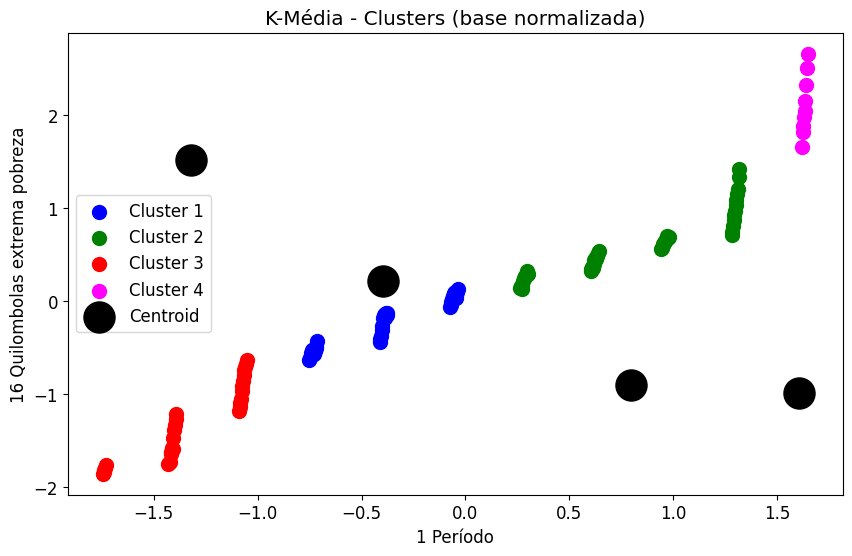

In [43]:
# Visualizando o resultado do K-Média
col_names = ['0 Referencia ID','1 Período','2 Pobreza','3 Pobreza Extrema','4 Total da pobreza',
             '5 População estimada','6 Pobreza Percentual','7 Pobreza Extrema Percentual','8 Vulnerabilidade Percentual',
             '9 Famílias pobreza','10 Famílias extrema pobreza','11 Famílias vulnerabilidade','12 Indígenas pobreza',
             '13 Indígenas extrema pobreza','14 Indígenas vulnerabilidade','14 Quilombolas pobreza','16 Quilombolas extrema pobreza',
             '17 Quilombolas vulnerabilidade','18 Ciganos pobreza','19 Ciganos extrema pobreza','20 Ciganos vulnerabilidade','21 time diff']
X = X_scaled
kmeans_result=KMeans(n_clusters=4, init='k-means++', random_state= 42)
kmeans_result.fit(X)
y_vars = kmeans_result.fit_predict(X_scaled)
X_vars_kmeans = df.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_
col_1 = 1
col_2 = 16
plt.figure(figsize=(10, 6))
plt.scatter(X[y_vars == 0, col_1], X[y_vars == 0, col_2], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, col_1], X[y_vars == 1, col_2], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, col_1], X[y_vars == 2, col_2], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_vars == 3, col_1], X[y_vars == 3, col_2], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 500, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.legend()
plt.show()
#referencia	periodo	pobreza	extrema_pobreza	total	populacao_estimada	porcentagem_pobreza

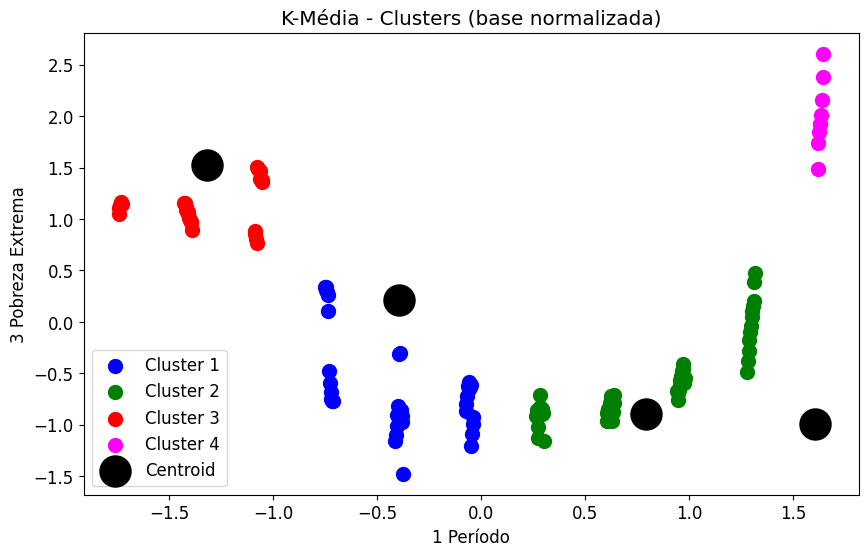

In [44]:
# Visualizando o resultado do K-Média
col_names = ['0 Referencia ID','1 Período','2 Pobreza','3 Pobreza Extrema','4 Total da pobreza',
             '5 População estimada','6 Pobreza Percentual','7 Pobreza Extrema Percentual','8 Vulnerabilidade Percentual',
             '9 Famílias pobreza','10 Famílias extrema pobreza','11 Famílias vulnerabilidade','12 Indígenas pobreza',
             '13 Indígenas extrema pobreza','14 Indígenas vulnerabilidade','14 Quilombolas pobreza','16 Quilombolas extrema pobreza',
             '17 Quilombolas vulnerabilidade','18 Ciganos pobreza','19 Ciganos extrema pobreza','20 Ciganos vulnerabilidade','21 time diff']
X = X_scaled
kmeans_result=KMeans(n_clusters=4, init='k-means++', random_state= 42)
kmeans_result.fit(X)
y_vars = kmeans_result.fit_predict(X_scaled)
X_vars_kmeans = df.copy()
X_vars_kmeans['Cluster_KMeans'] = kmeans_result.labels_
col_1 = 1
col_2 = 3
plt.figure(figsize=(10, 6))
plt.scatter(X[y_vars == 0, col_1], X[y_vars == 0, col_2], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_vars == 1, col_1], X[y_vars == 1, col_2], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_vars == 2, col_1], X[y_vars == 2, col_2], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_vars == 3, col_1], X[y_vars == 3, col_2], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans_result.cluster_centers_[:, 0], kmeans_result.cluster_centers_[:, 2], s = 500, c = 'black', label = 'Centroid') # modificado
plt.rcParams.update({'font.size': 12})
plt.title('K-Média - Clusters (base normalizada)')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.legend()
plt.show()
#referencia	periodo	pobreza	extrema_pobreza	total	populacao_estimada	porcentagem_pobreza

# DbScan

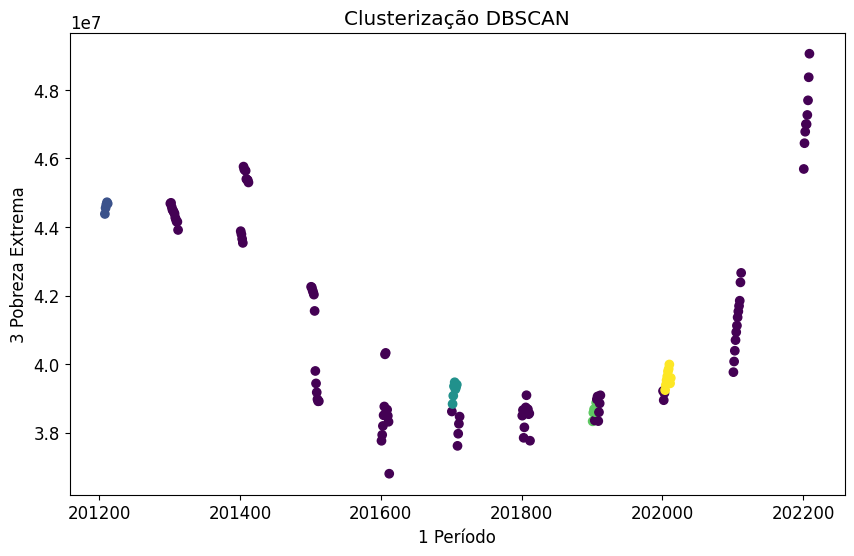

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Substitua 'seu_dataset.csv' pelo caminho do seu arquivo
data = df.copy()

# Selecionar as features numéricas
X = data[fields]

X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adicionar a coluna de clusters ao DataFrame original
data['cluster'] = clusters

col_1 = 1
col_2 = 3

# Visualizar os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data[fields[col_1]], data[fields[col_2]], c=data['cluster'], cmap='viridis')
plt.xlabel(col_names[col_1])
plt.ylabel(col_names[col_2])
plt.title('Clusterização DBSCAN')
plt.show()

# Por: `Eder Martins`

## Obrigado!